In [5]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
sales = pd.read_csv('/Users/utkarshhajare/DS material/Assignements/Basic Statistics Assignment/sales_data_with_discounts.csv')

In [6]:
sales.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01/04/21,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01/04/21,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01/04/21,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01/04/21,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01/04/21,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


Descriptive Analytics for Numerical Columns

In [7]:
sales.select_dtypes(include='number')

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [11]:
sales.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


Statistics of above data frame


In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [21]:
sales_numeric_data = sales.select_dtypes(include=['number','float'])

In [18]:
sales.select_dtypes(include=['number','float']).median()

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [24]:
sales_numeric_data.mode().iloc[0]

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

Data Visualization

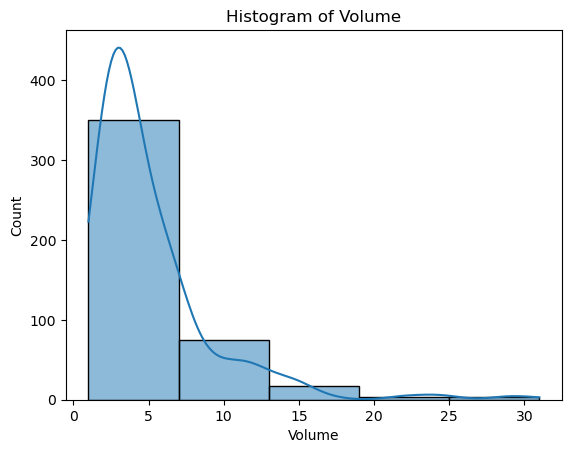

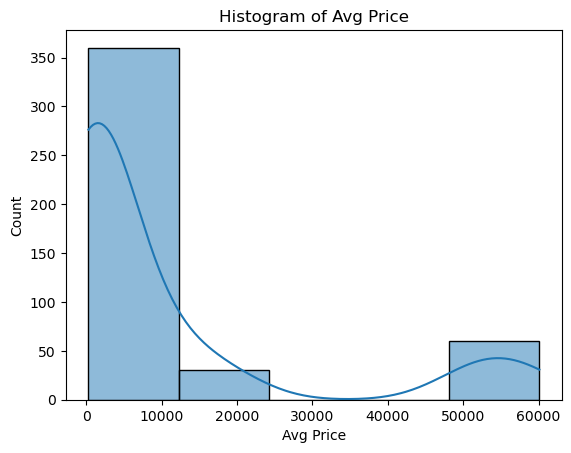

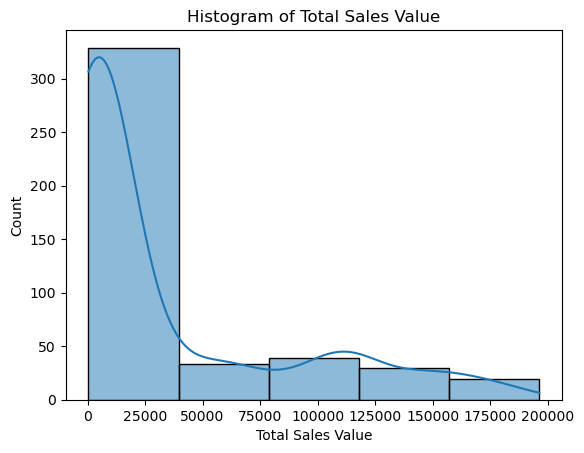

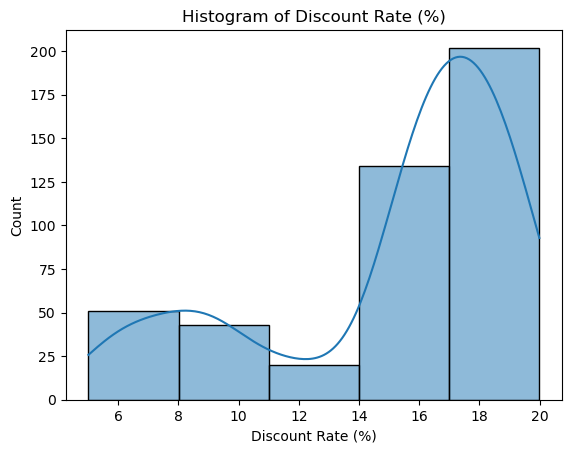

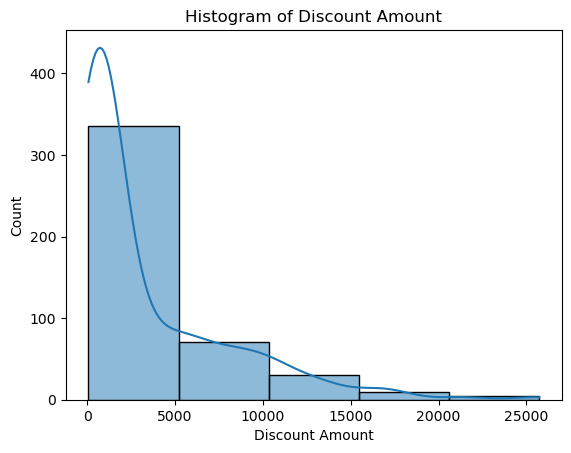

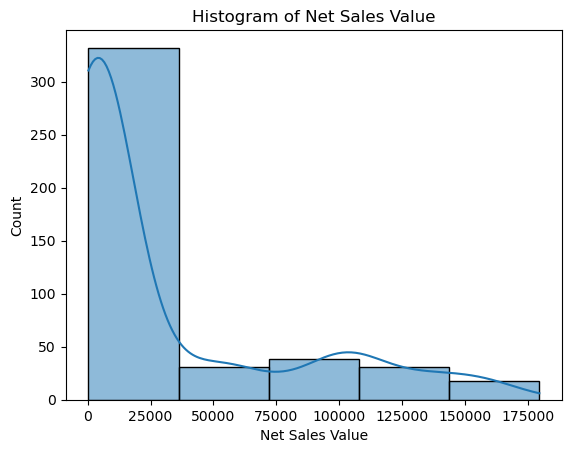

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in sales.select_dtypes(include=['number']).columns:
    sns.histplot(sales[col], kde=True, bins=5)
    plt.title(f'Histogram of {col}')
    plt.show()

In [31]:
sales_numeric_data.skew(skipna=True)

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

Boxplot

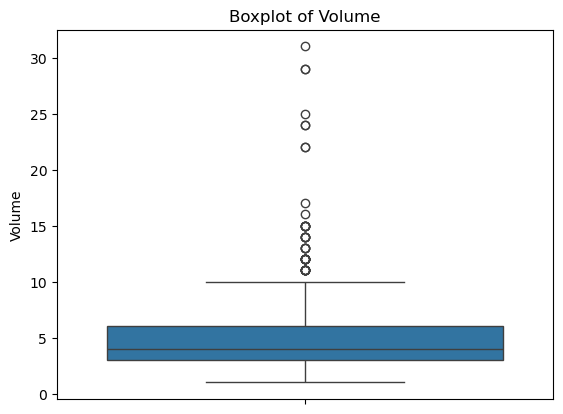

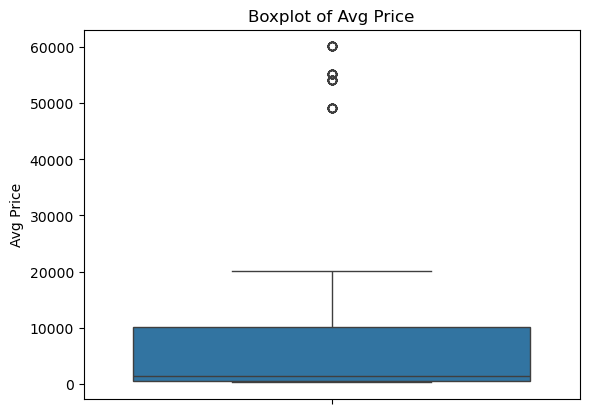

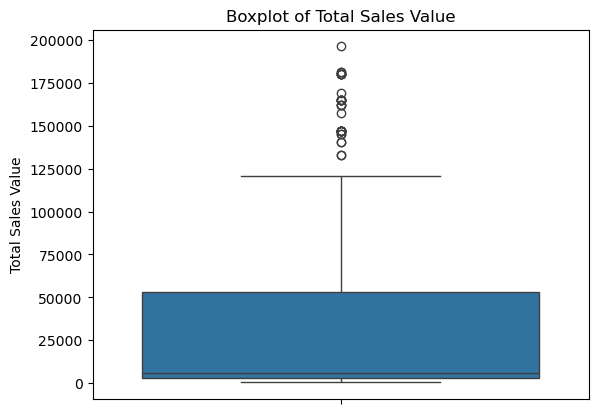

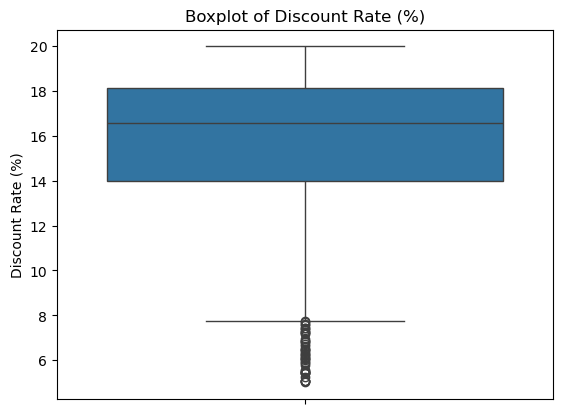

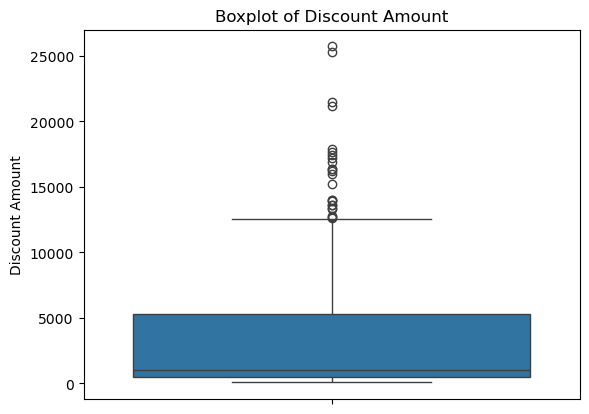

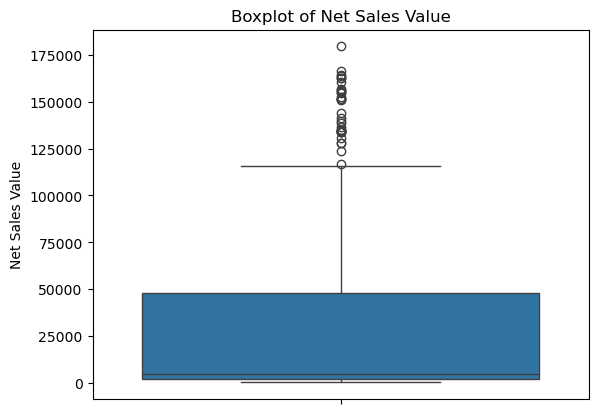

In [32]:
for col in sales_numeric_data.columns:
    sns.boxplot(y=sales[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

1. Volume: After 10 units volume has outliers in every range i.e. outliers are evenly spread for volume data
2. Avg price: It has less outliers compare to all the dimensions in sales data frame
3. Total sales value: Same as volume many outliers are there which has been spread evenly
4. Discount rate%: discount ranges between 14 to 18 also between 5 to 8
5. Discount amount: the higher discount apart from interquartile range is given in range of 13,000 to 18,000

Bar Charts for categorical columns

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_2751/1372775235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sales.select_dtypes(include=['object'])[col], palette='coolwarm')


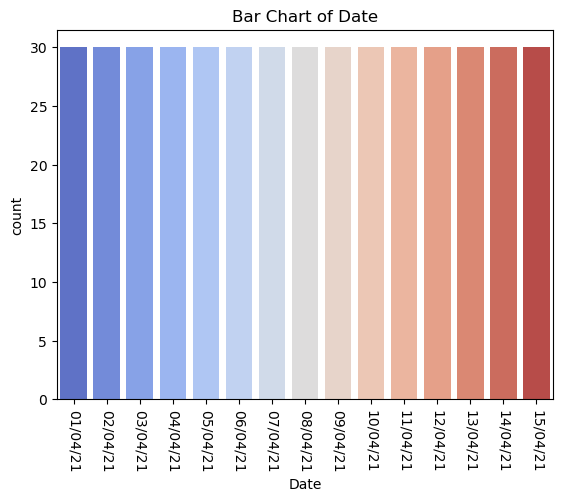

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_2751/1372775235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sales.select_dtypes(include=['object'])[col], palette='coolwarm')


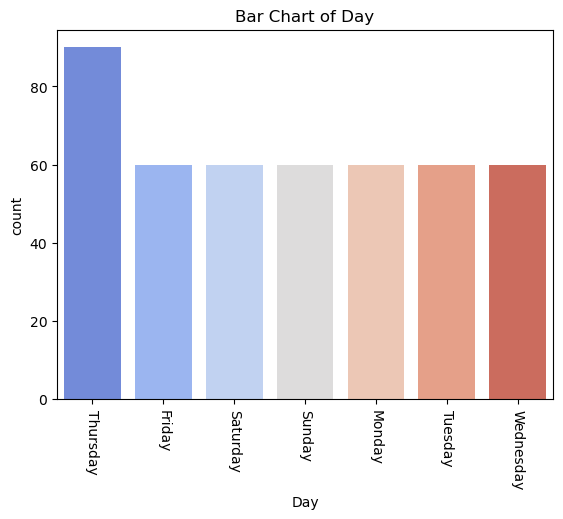

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_2751/1372775235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sales.select_dtypes(include=['object'])[col], palette='coolwarm')


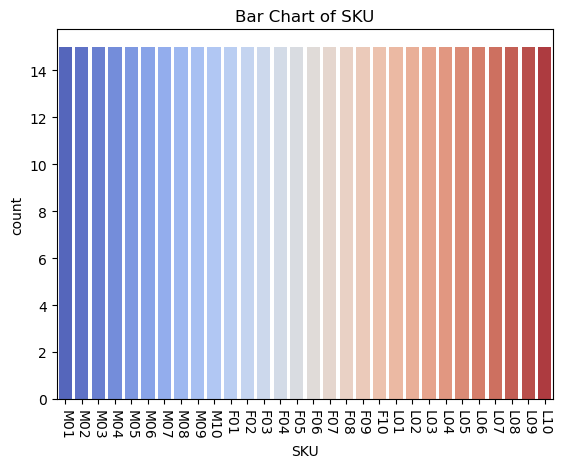

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_2751/1372775235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sales.select_dtypes(include=['object'])[col], palette='coolwarm')


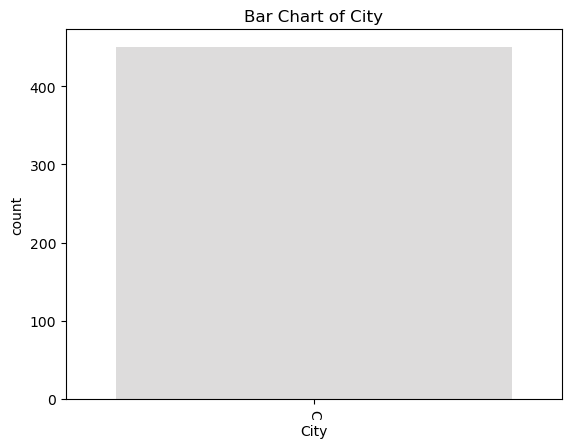

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_2751/1372775235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sales.select_dtypes(include=['object'])[col], palette='coolwarm')


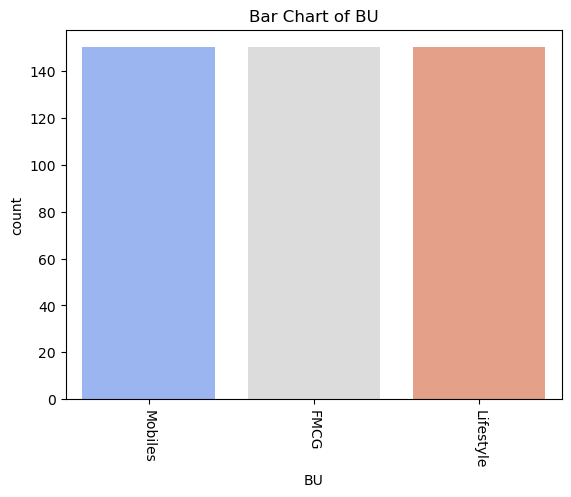

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_2751/1372775235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sales.select_dtypes(include=['object'])[col], palette='coolwarm')


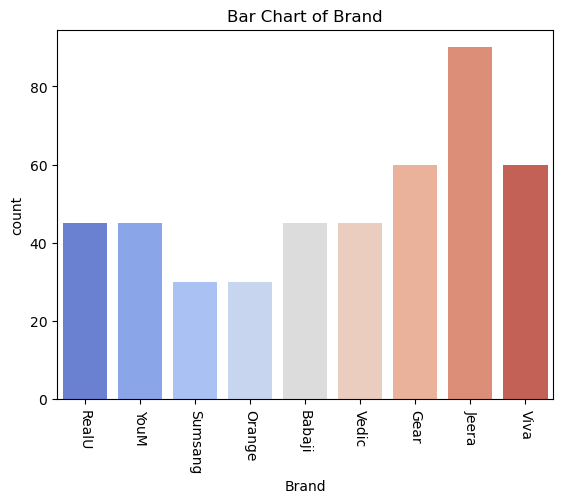

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_2751/1372775235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sales.select_dtypes(include=['object'])[col], palette='coolwarm')


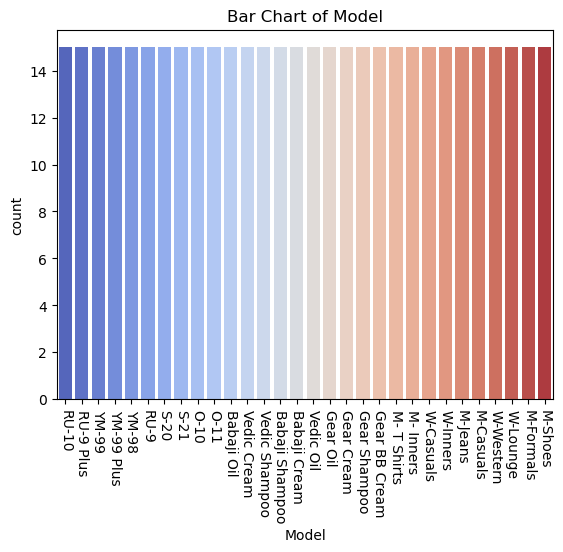

In [36]:
for col in sales.select_dtypes(include=['object']):
    sns.countplot(x=sales.select_dtypes(include=['object'])[col], palette='coolwarm')
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=270) 
    plt.show()

Here on each day sales is equal i.e. each day 30 items are getting sold. Thurdays are more in given data frame. SKUs are also same. City is only one which is 'c'. Three BUs are there with same number of count. Talking about brand, Jeera has the most number of products while orange & sumsang has least. 

Standardization z-score normalization

Standardization is a data preprocessing technique used to rescale numerical features so that they have a mean of 0 and a standard deviation of 1. This makes different features comparable and improves the performance of machine learning models.

In [49]:
from sklearn.preprocessing import StandardScaler
sales_std = pd.DataFrame(StandardScaler().fit_transform(sales_numeric_data),columns=sales_numeric_data.columns ,index=sales_numeric_data.index)

In [58]:
sales_z_score = (sales_numeric_data - sales_numeric_data.mean())/sales_numeric_data.std()

In [60]:
sales_z_score.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


In [50]:
sales_std.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


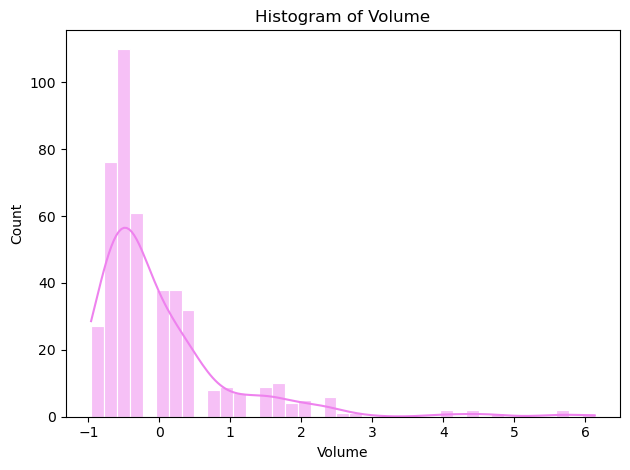

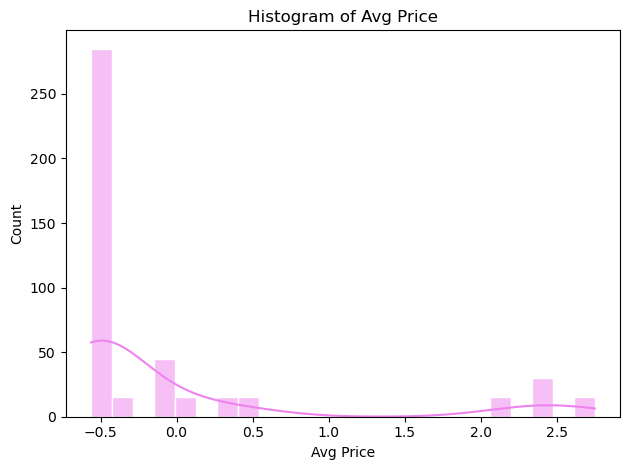

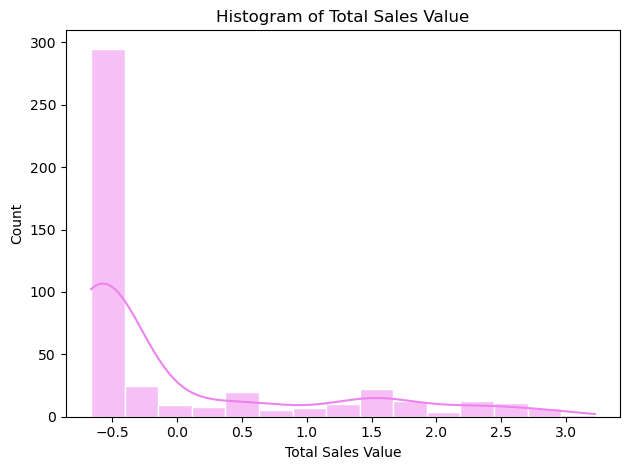

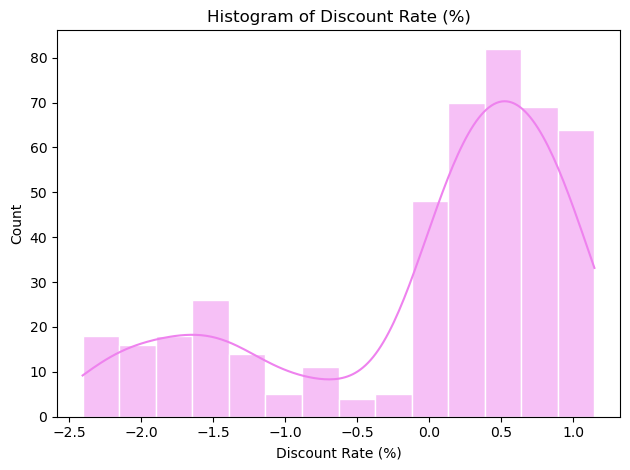

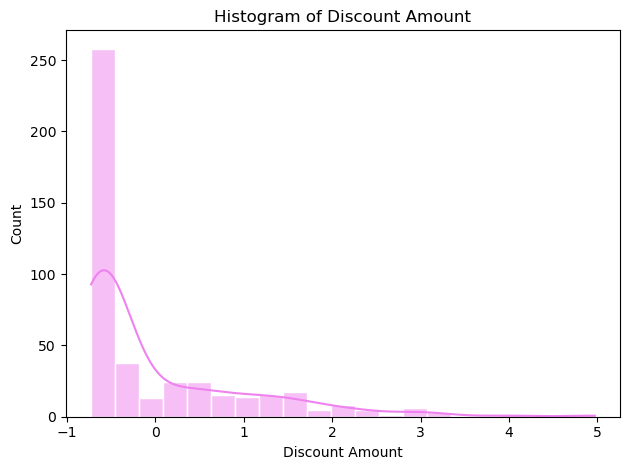

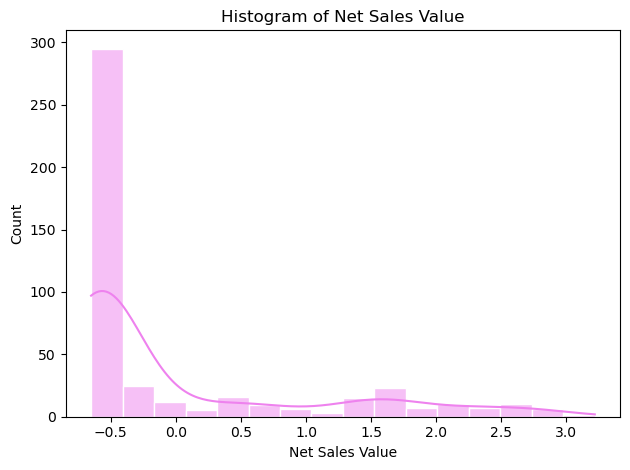

In [57]:
"""sns.histplot(sales_std, bins=10, kde=True, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()"""
for col in sales_std.columns:
    sns.histplot(sales_std[col], kde=True, color='violet', edgecolor='white')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

One-hot encoding

Why one-hot encoding is necessary:
Machine learning models cannot work with categorical (string) data directly.
Example: If a column has values like "Red", "Blue", and "Green", the model cannot process them.
Instead of using labels (1, 2, 3), which can be misleading, we use binary vectors (0s & 1s).

In [61]:
sales_categorical = sales.select_dtypes(include='object')

In [66]:
pd.get_dummies(sales_categorical, sales_categorical.columns).astype(int)

,Date_01/04/21,Date_02/04/21,Date_03/04/21,Date_04/04/21,Date_05/04/21,Date_06/04/21,Date_07/04/21,Date_08/04/21,Date_09/04/21,Date_10/04/21,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Summary:
1. Data frame needs to divide further according to brands and their respective products as each brand will have different sales value and different price.
2. In discount and Net Sales Value outliers are forming different range i.e. they don't have few outliers hence affecting the overall operation.
3. Starnge thing is on each day there is perfect sale of 30 items only, neither less than 30 nor more than 30.
4. After standardizing none of the columns giving normal distribution

Standardization:
Many machine learning algorithms (like Linear Regression, KNN, SVM, and Neural Networks) are sensitive to feature scale. Features with different scales can dominate the model, leading to biased predictions.
1. Standardization scales all features to have mean = 0 and std = 1, making them equally important.
2. Removes bias caused by different scales.
3. Improves convergence speed of Gradient Descent in optimization algorithms.
4. Enhances model performance for distance-based models (KNN, SVM).
5. Required for PCA (Principal Component Analysis) and deep learning models.

One-hot encoding:
Machine learning models cannot process categorical data directly. They only work with numbers. One-Hot Encoding converts categorical variables into numerical form without introducing unintended ordinal relationships.
1. Prevents models from assuming ordinal relationships in categorical data.
2. Makes categorical variables machine-readable.
3. Enhances model interpretability and performance.

Standardization ensures numerical stability and fair weighting of features.
One-Hot Encoding prevents incorrect ordinal relationships in categorical data.